In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
PathToRepo = os.path.normpath(os.getcwd() + os.sep + os.pardir)
Data = pd.read_csv(PathToRepo + '\\Data\\Faellesdata.csv')
Data.columns

Index(['rsph', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Rcyl', 'phi', 'vRcyl', 'vphi',
       'rsph_form', 'x_form', 'y_form', 'z_form', 'vx_form', 'vy_form',
       'vz_form', 'Rcyl_form', 'phi_form', 'vRcyl_form', 'vphi_form', 'age',
       'mass', 'feh', 'oh', 'ch', 'mgh', 'ofe', 'cfe', 'mgfe',
       'IsMigratorBool', 'IsMigratorInt'],
      dtype='object')

In [107]:
Data = Data.drop('IsMigratorBool', axis=1)
for i in range(len(Data.columns)):
    Data.rename(columns = {Data.columns[i]: "$" + Data.columns[i] + "$"}, inplace = True)
    if Data.columns[i].endswith('form$'):
        Data.rename(columns = {Data.columns[i]: Data.columns[i].removesuffix('form$') + r"{form}$"}, inplace = True)
    if "phi" in Data.columns[i]:
        Data.rename(columns = {Data.columns[i]: Data.columns[i].replace("phi", r"\phi")}, inplace = True)


In [ ]:
corr = Data.corr()

styler = corr.style
      
(styler.background_gradient(cmap='YlGnBu', vmin=0, vmax=1))

styler.format("{:.2f}")

styler.to_latex(
    PathToRepo + '\\Tables\\Correlation.tex', 
    # float_format="%.2f",
    caption="Correlation matrix of the variables in the dataset",
    label="tab:Correlation",
    clines="skip-last;data",
    convert_css=True,
    position_float="centering",
    multicol_align="|c|",
    hrules=True,
    position="h!"
)  

Index(['$rsph$', '$x$', '$y$', '$z$', '$vx$', '$vy$', '$vz$', '$Rcyl$',
       '$\phi$', '$vRcyl$', '$v\phi$', '$rsph_{form}$', '$x_{form}$',
       '$y_{form}$', '$z_{form}$', '$vx_{form}$', '$vy_{form}$', '$vz_{form}$',
       '$Rcyl_{form}$', '$\phi_{form}$', '$vRcyl_{form}$', '$v\phi_{form}$',
       '$age$', '$mass$', '$feh$', '$oh$', '$ch$', '$mgh$', '$ofe$', '$cfe$',
       '$mgfe$', '$IsMigratorInt$'],
      dtype='object')

In [123]:
independent_data = Data.drop(['$rsph$', '$x$', '$y$', '$z$', '$vx$', '$vy$', '$vz$',r'$rsph_{form}$', r'$x_{form}$', 
                              r'$y_{form}$', r'$z_{form}$', r'$vx_{form}$', r'$vy_{form}$', r'$vz_{form}$'], axis = 1)


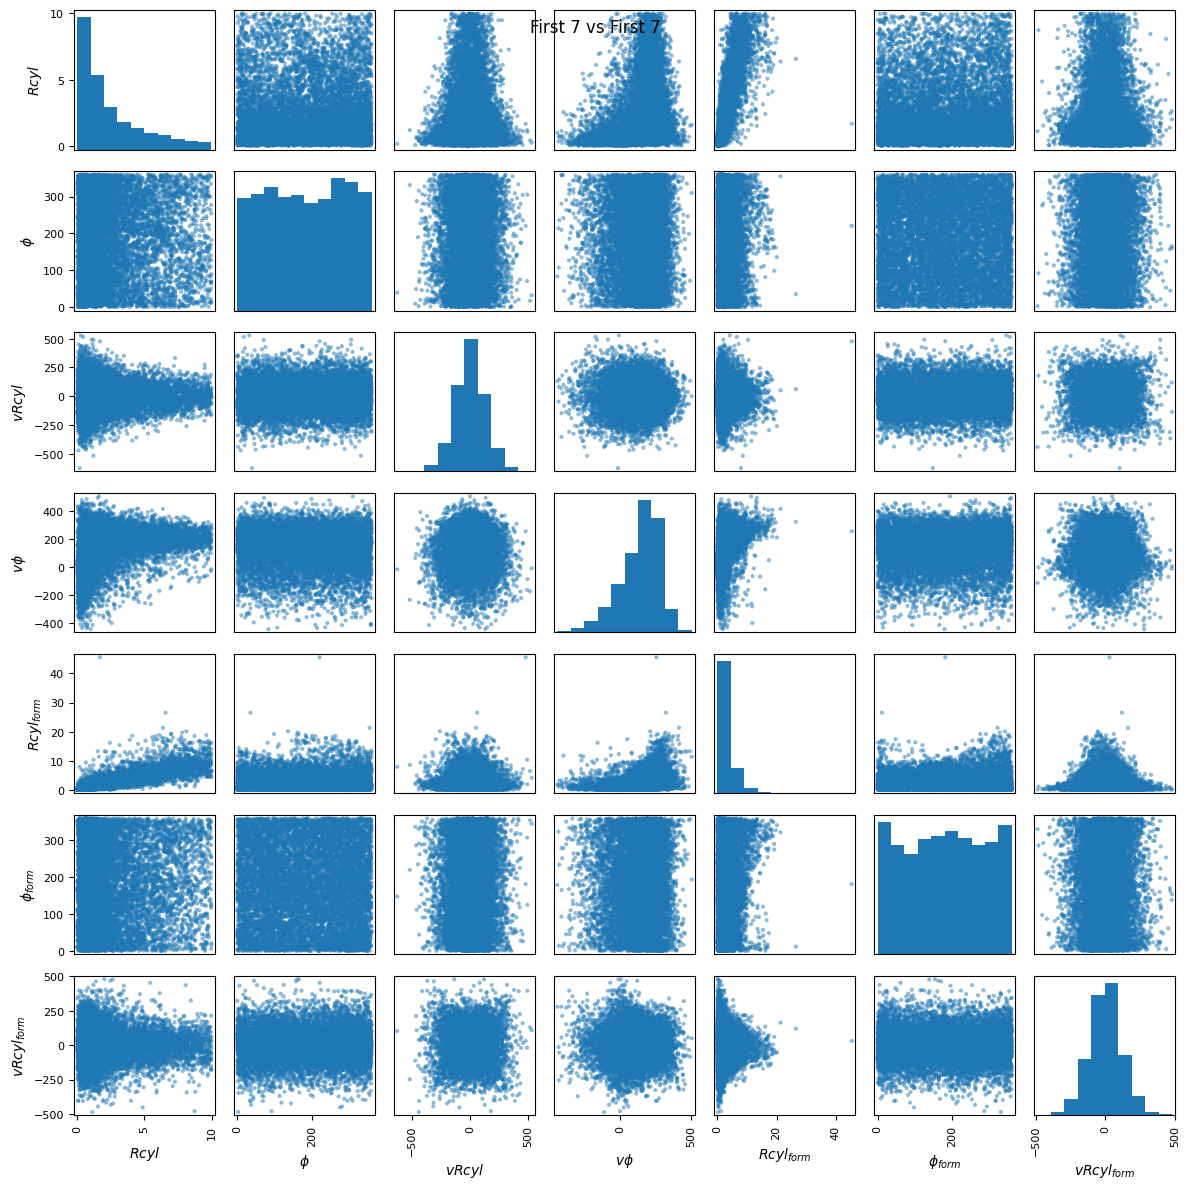

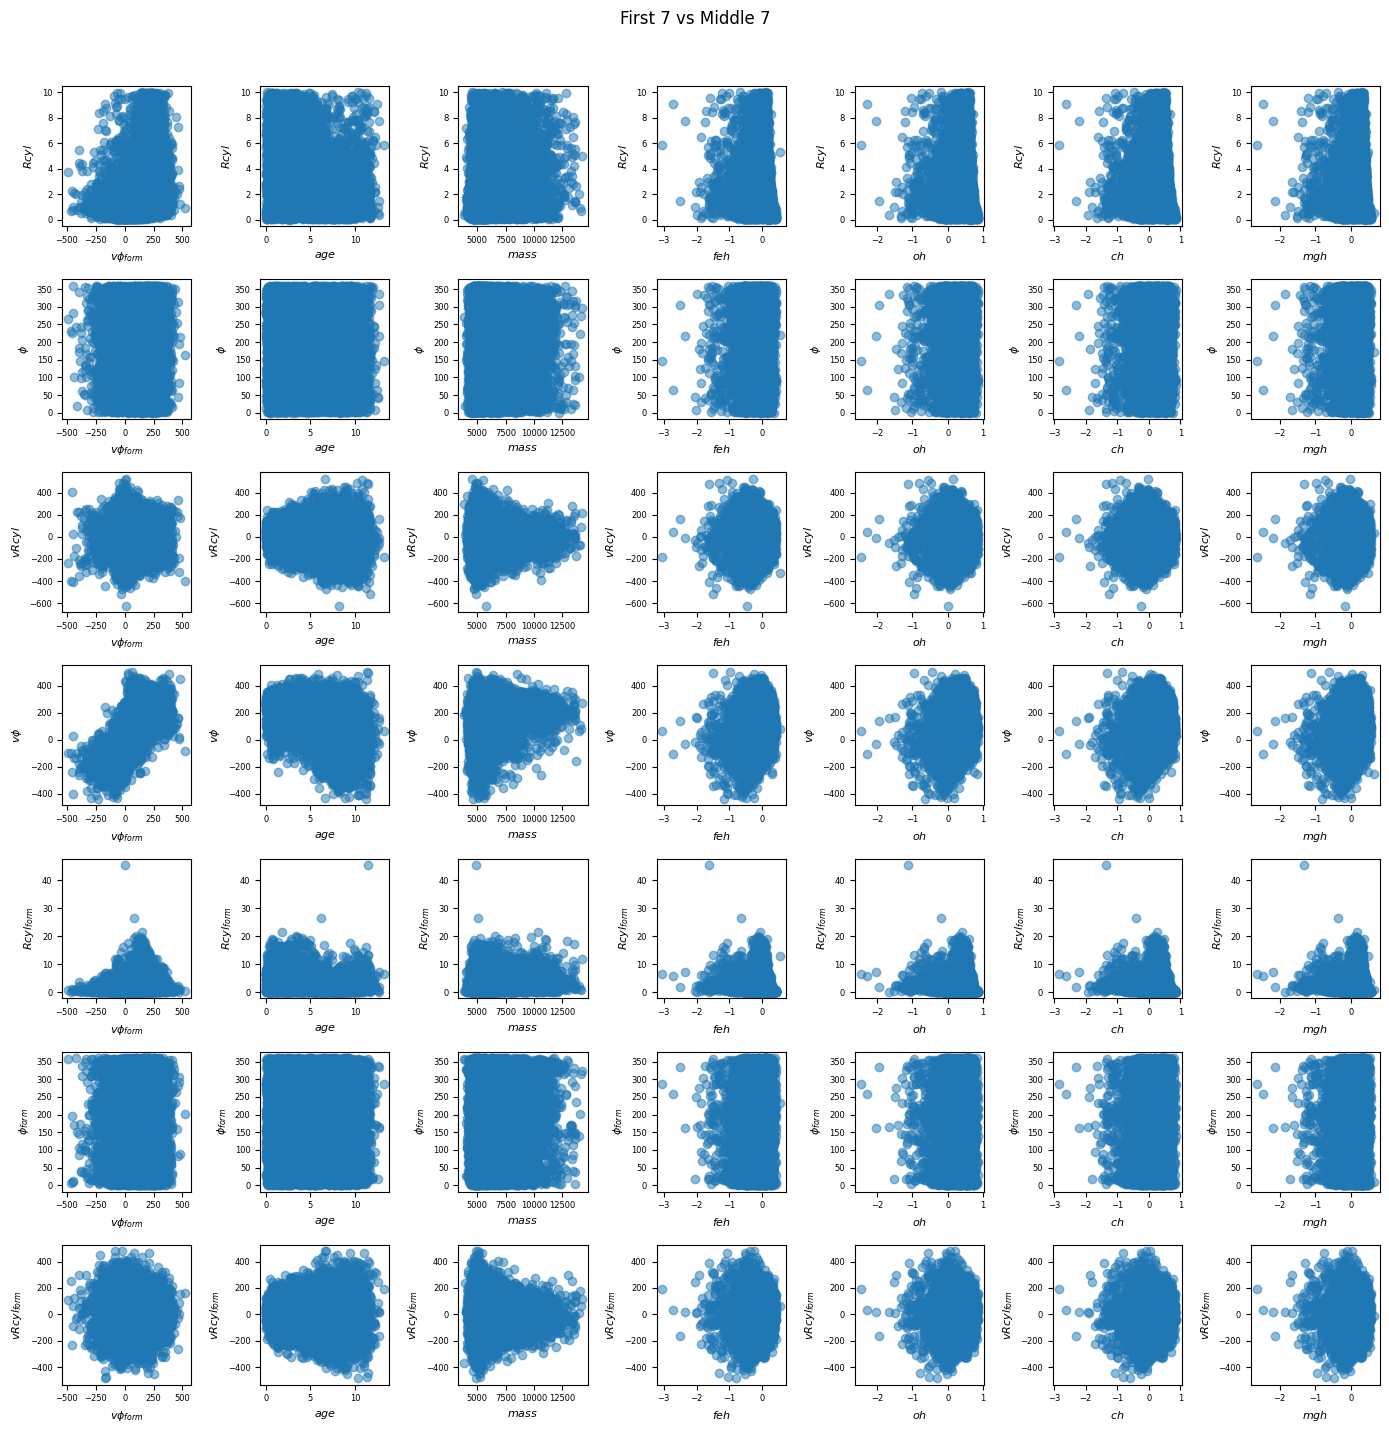

In [ ]:
from pandas.plotting import scatter_matrix

# Assuming independent_data is your pandas DataFrame with 21 columns

# Split the DataFrame into three groups of 7 columns each
first_7 = independent_data.iloc[:, :7]      # First 7 columns
middle_7 = independent_data.iloc[:, 7:14]   # Middle 7 columns
last_7 = independent_data.iloc[:, 14:]      # Last 7 columns

# 1. First 7 vs First 7
scatter_matrix(first_7, figsize=(12, 12))
plt.tight_layout()
plt.suptitle('First 7 vs First 7')
plt.show()

# 2. First 7 vs Middle 7
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for i, col1 in enumerate(first_7.columns):
    for j, col2 in enumerate(middle_7.columns):
        axes[i, j].scatter(middle_7[col2], first_7[col1], alpha=0.5)
        axes[i, j].set_xlabel(col2, fontsize=8)
        axes[i, j].set_ylabel(col1, fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('First 7 vs Middle 7', y=1.02)
plt.tight_layout()
plt.show()

# 3. First 7 vs Last 7
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for i, col1 in enumerate(first_7.columns):
    for j, col2 in enumerate(last_7.columns):
        axes[i, j].scatter(last_7[col2], first_7[col1], alpha=0.5)
        axes[i, j].set_xlabel(col2, fontsize=8)
        axes[i, j].set_ylabel(col1, fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('First 7 vs Last 7', y=1.02)
plt.tight_layout()
plt.show()

# 4. Middle 7 vs First 7
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for i, col1 in enumerate(middle_7.columns):
    for j, col2 in enumerate(first_7.columns):
        axes[i, j].scatter(first_7[col2], middle_7[col1], alpha=0.5)
        axes[i, j].set_xlabel(col2, fontsize=8)
        axes[i, j].set_ylabel(col1, fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Middle 7 vs First 7', y=1.02)
plt.tight_layout()
plt.show()

# 5. Middle 7 vs Middle 7
scatter_matrix(middle_7, figsize=(12, 12))
plt.tight_layout()
plt.suptitle('Middle 7 vs Middle 7')
plt.show()

# 6. Middle 7 vs Last 7
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for i, col1 in enumerate(middle_7.columns):
    for j, col2 in enumerate(last_7.columns):
        axes[i, j].scatter(last_7[col2], middle_7[col1], alpha=0.5)
        axes[i, j].set_xlabel(col2, fontsize=8)
        axes[i, j].set_ylabel(col1, fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Middle 7 vs Last 7', y=1.02)
plt.tight_layout()
plt.show()

# 7. Last 7 vs First 7
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for i, col1 in enumerate(last_7.columns):
    for j, col2 in enumerate(first_7.columns):
        axes[i, j].scatter(first_7[col2], last_7[col1], alpha=0.5)
        axes[i, j].set_xlabel(col2, fontsize=8)
        axes[i, j].set_ylabel(col1, fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Last 7 vs First 7', y=1.02)
plt.tight_layout()
plt.show()

# 8. Last 7 vs Middle 7
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for i, col1 in enumerate(last_7.columns):
    for j, col2 in enumerate(middle_7.columns):
        axes[i, j].scatter(middle_7[col2], last_7[col1], alpha=0.5)
        axes[i, j].set_xlabel(col2, fontsize=8)
        axes[i, j].set_ylabel(col1, fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Last 7 vs Middle 7', y=1.02)
plt.tight_layout()
plt.show()

# 9. Last 7 vs Last 7
scatter_matrix(last_7, figsize=(12, 12))
plt.tight_layout()
plt.suptitle('Last 7 vs Last 7')
plt.show()
